In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Since our original selection of 6 species did not contain enough data points for reasonable analysis, we returned to the dataset and pulled all of the species having more than 100 data points apiece.  From these, we selected 6 to proceed with.

In [3]:
mammals = pd.read_csv('MamPopd_Ecog_Data_R2.csv')

In [5]:
mammals_clean = mammals.dropna(axis=1)

In [6]:
mammals_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                6729 non-null   object 
 1   Order                  6729 non-null   object 
 2   Family                 6729 non-null   object 
 3   Year                   6729 non-null   int64  
 4   Longitude              6729 non-null   float64
 5   Latitude               6729 non-null   float64
 6   Country                6729 non-null   object 
 7   Density (Ind/km2)      6729 non-null   float64
 8   Mass (g)               6729 non-null   float64
 9   Diet                   6729 non-null   object 
 10  Continent              6729 non-null   object 
 11  Human Footprint_1deg   6729 non-null   float64
 12  NDVI_1deg              6729 non-null   float64
 13  Species Richness_1deg  6729 non-null   float64
 14  NDVI_1km               6729 non-null   float64
 15  Spec

In [7]:
for x in mammals_clean.Species.unique():
    if mammals_clean['Species'].str.contains(x).value_counts()[True] > 100:
        print(x,mammals_clean['Species'].str.contains(x).value_counts()[True])

Axis axis 107
Lepus americanus 130
Loxodonta africana 352
Panthera pardus 143
Panthera tigris 178
Sus scrofa 160
Syncerus caffer 117
Tamiasciurus hudsonicus 246
Pongo pygmaeus 171


In [8]:
axis = mammals_clean.loc[mammals_clean['Species'].str.contains('Axis axis')]
lepus = mammals_clean.loc[mammals_clean['Species'].str.contains('Lepus americanus')]
loxo = mammals_clean.loc[mammals_clean['Species'].str.contains('Loxodonta africana')]
pardus = mammals_clean.loc[mammals_clean['Species'].str.contains('Panthera pardus')]
tigris = mammals_clean.loc[mammals_clean['Species'].str.contains('Panthera tigris')]
sus = mammals_clean.loc[mammals_clean['Species'].str.contains('Sus scrofa')]
syncerus = mammals_clean.loc[mammals_clean['Species'].str.contains('Syncerus caffer')]
tamia = mammals_clean.loc[mammals_clean['Species'].str.contains('Tamiasciurus hudsonicus')]
pongo = mammals_clean.loc[mammals_clean['Species'].str.contains('Pongo pygmaeus')]

In [9]:
mammals_100 = axis
mammals_100 = mammals_100.merge(loxo,how='outer')
mammals_100 = mammals_100.merge(pardus,how='outer')
mammals_100 = mammals_100.merge(tigris,how='outer')
mammals_100 = mammals_100.merge(sus,how='outer')
mammals_100 = mammals_100.merge(syncerus,how='outer')

Our new selection of species includes *Axis axis* (chital deer), *Loxodonta africana* (African elephant), *Panthera pardus* (leopard), *Panthera tigris* (tiger), *Sus scrofa* (wild boar), and *Syncerus caffer* (African buffalo), for a total of 1057 data points.

In [10]:
mammals_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1056
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1057 non-null   object 
 1   Order                  1057 non-null   object 
 2   Family                 1057 non-null   object 
 3   Year                   1057 non-null   int64  
 4   Longitude              1057 non-null   float64
 5   Latitude               1057 non-null   float64
 6   Country                1057 non-null   object 
 7   Density (Ind/km2)      1057 non-null   float64
 8   Mass (g)               1057 non-null   float64
 9   Diet                   1057 non-null   object 
 10  Continent              1057 non-null   object 
 11  Human Footprint_1deg   1057 non-null   float64
 12  NDVI_1deg              1057 non-null   float64
 13  Species Richness_1deg  1057 non-null   float64
 14  NDVI_1km               1057 non-null   float64
 15  Spec

We again wanted to see if we could predict species density via indicators like NDVI, Human Footprint Index, or Species Richness.

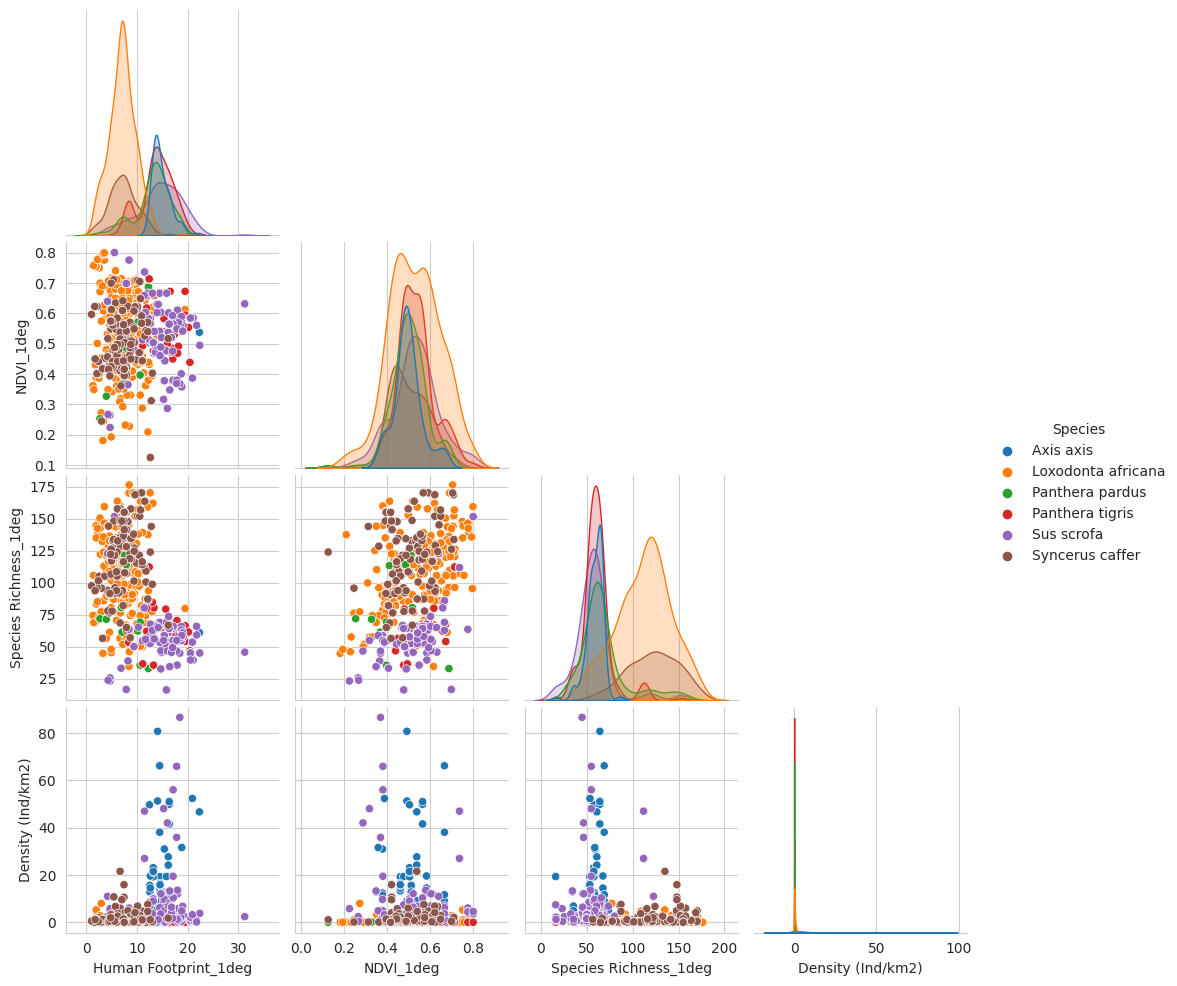

In [11]:
sns.pairplot(mammals_100,
                hue = 'Species',
                y_vars = ['Human Footprint_1deg','NDVI_1deg','Species Richness_1deg','Density (Ind/km2)'],
                x_vars = ['Human Footprint_1deg','NDVI_1deg','Species Richness_1deg','Density (Ind/km2)'],
                corner = True)

plt.show()

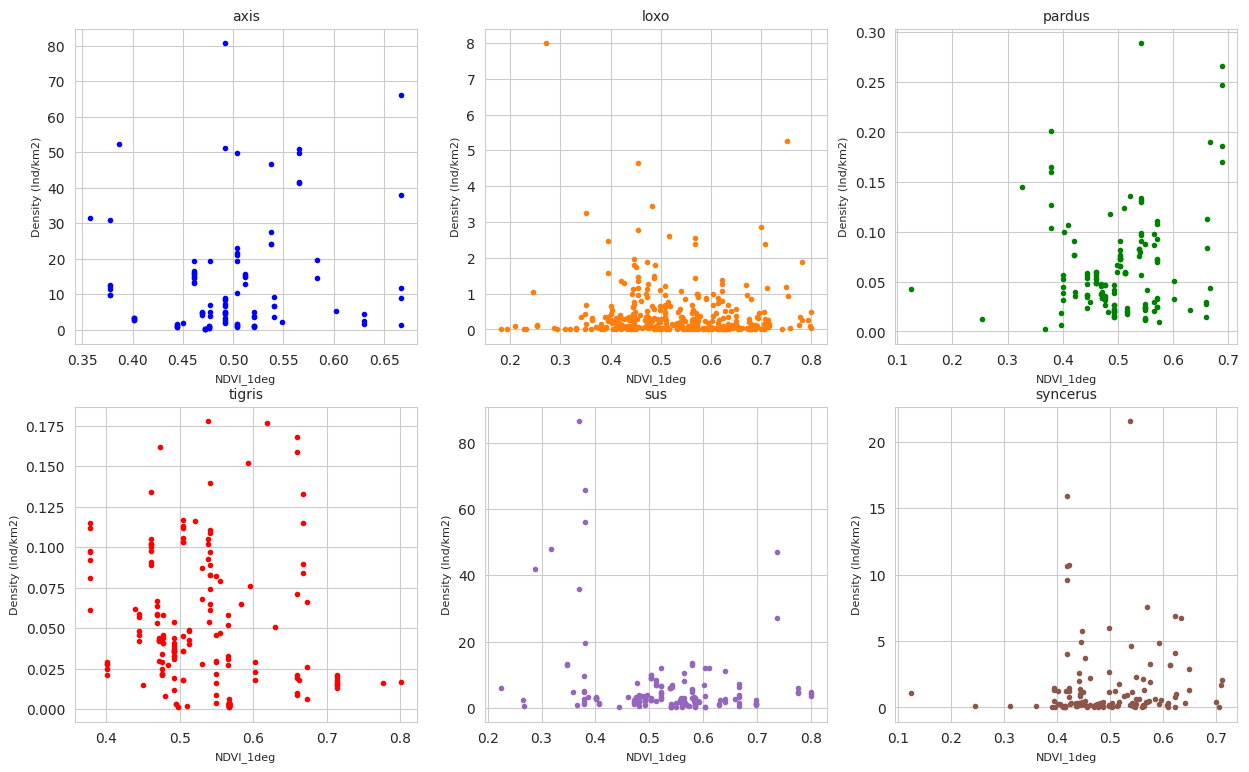

In [12]:
fig,axes = plt.subplots(2,3,figsize=(15,9))

axes[0,0].plot(axis['NDVI_1deg'],axis['Density (Ind/km2)'],'b.')
axes[0,0].set_xlabel('NDVI_1deg', fontsize=8)
axes[0,0].set_ylabel('Density (Ind/km2)', fontsize=8)
axes[0,0].set_title('axis', fontsize=10)

axes[0,1].plot(loxo['NDVI_1deg'],loxo['Density (Ind/km2)'],color='tab:orange',marker='.',linewidth=0)
axes[0,1].set_xlabel('NDVI_1deg', fontsize=8)
axes[0,1].set_ylabel('Density (Ind/km2)', fontsize=8)
axes[0,1].set_title('loxo', fontsize=10)

axes[0,2].plot(pardus['NDVI_1deg'],pardus['Density (Ind/km2)'],'g.')
axes[0,2].set_xlabel('NDVI_1deg', fontsize=8)
axes[0,2].set_ylabel('Density (Ind/km2)', fontsize=8)
axes[0,2].set_title('pardus', fontsize=10)

axes[1,0].plot(tigris['NDVI_1deg'],tigris['Density (Ind/km2)'],'r.')
axes[1,0].set_xlabel('NDVI_1deg', fontsize=8)
axes[1,0].set_ylabel('Density (Ind/km2)', fontsize=8)
axes[1,0].set_title('tigris', fontsize=10)

axes[1,1].plot(sus['NDVI_1deg'],sus['Density (Ind/km2)'],color='tab:purple',marker='.',linewidth=0)
axes[1,1].set_xlabel('NDVI_1deg', fontsize=8)
axes[1,1].set_ylabel('Density (Ind/km2)', fontsize=8)
axes[1,1].set_title('sus', fontsize=10)

axes[1,2].plot(syncerus['NDVI_1deg'],syncerus['Density (Ind/km2)'],color='tab:brown',marker='.',linewidth=0)
axes[1,2].set_xlabel('NDVI_1deg', fontsize=8)
axes[1,2].set_ylabel('Density (Ind/km2)', fontsize=8)
axes[1,2].set_title('syncerus', fontsize=10)

plt.show()

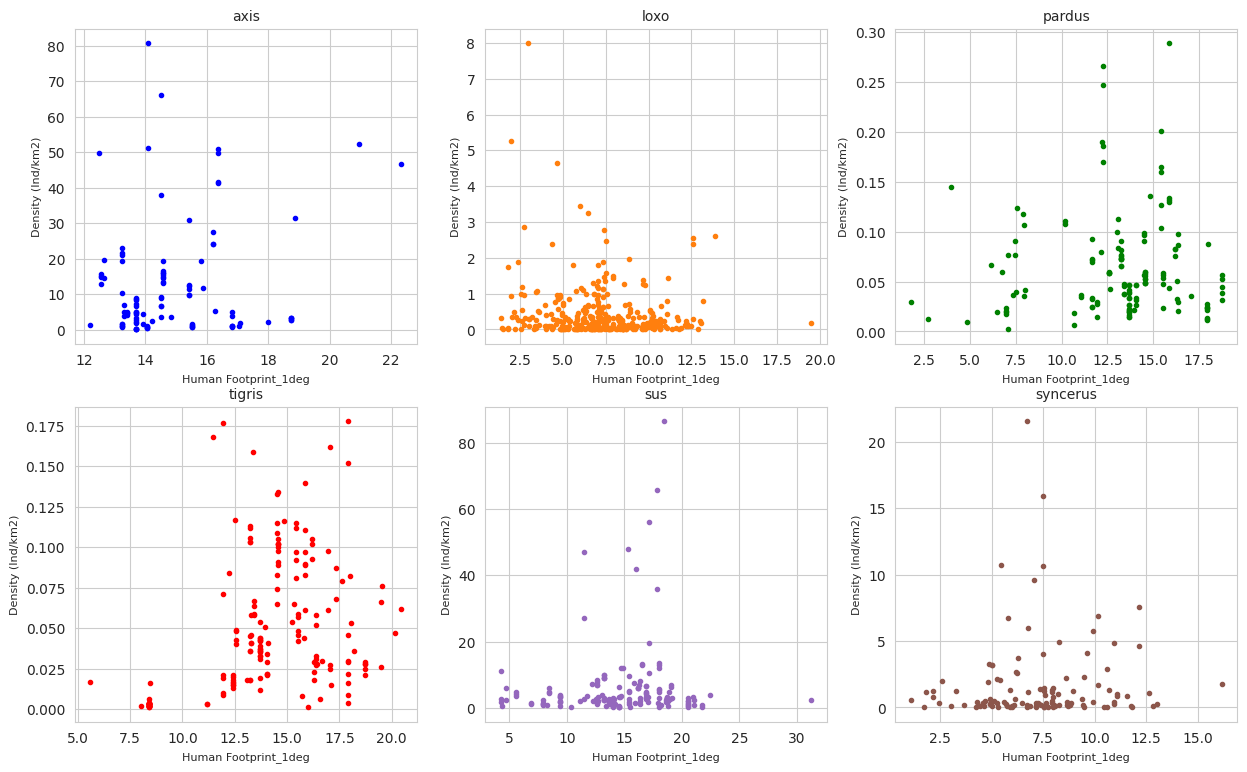

In [13]:
fig,axes = plt.subplots(2,3,figsize=(15,9))

axes[0,0].plot(axis['Human Footprint_1deg'],axis['Density (Ind/km2)'],'b.')
axes[0,0].set_xlabel('Human Footprint_1deg', fontsize=8)
axes[0,0].set_ylabel('Density (Ind/km2)', fontsize=8)
axes[0,0].set_title('axis', fontsize=10)

axes[0,1].plot(loxo['Human Footprint_1deg'],loxo['Density (Ind/km2)'],color='tab:orange',marker='.',linewidth=0)
axes[0,1].set_xlabel('Human Footprint_1deg', fontsize=8)
axes[0,1].set_ylabel('Density (Ind/km2)', fontsize=8)
axes[0,1].set_title('loxo', fontsize=10)

axes[0,2].plot(pardus['Human Footprint_1deg'],pardus['Density (Ind/km2)'],'g.')
axes[0,2].set_xlabel('Human Footprint_1deg', fontsize=8)
axes[0,2].set_ylabel('Density (Ind/km2)', fontsize=8)
axes[0,2].set_title('pardus', fontsize=10)

axes[1,0].plot(tigris['Human Footprint_1deg'],tigris['Density (Ind/km2)'],'r.')
axes[1,0].set_xlabel('Human Footprint_1deg', fontsize=8)
axes[1,0].set_ylabel('Density (Ind/km2)', fontsize=8)
axes[1,0].set_title('tigris', fontsize=10)

axes[1,1].plot(sus['Human Footprint_1deg'],sus['Density (Ind/km2)'],color='tab:purple',marker='.',linewidth=0)
axes[1,1].set_xlabel('Human Footprint_1deg', fontsize=8)
axes[1,1].set_ylabel('Density (Ind/km2)', fontsize=8)
axes[1,1].set_title('sus', fontsize=10)

axes[1,2].plot(syncerus['Human Footprint_1deg'],syncerus['Density (Ind/km2)'],color='tab:brown',marker='.',linewidth=0)
axes[1,2].set_xlabel('Human Footprint_1deg', fontsize=8)
axes[1,2].set_ylabel('Density (Ind/km2)', fontsize=8)
axes[1,2].set_title('syncerus', fontsize=10)

plt.show()

It was again difficult to discern whether any of the species was linearly correlated with these features, so we fit some models to compare MSEs.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.model_selection import KFold

In [16]:
kfold = KFold(5,
              shuffle = True,
              random_state = 919)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [18]:
def critter_test(critter_data):

    critter_train, critter_test = train_test_split(critter_data.copy(),
                                        random_state = 919,
                                        shuffle = True,
                                        test_size=.2)

    mses = np.zeros((4, 5))
    i = 0
    for train_index, test_index in kfold.split(critter_train):
        critter_t_t = critter_train.iloc[train_index]
        critter_ho = critter_train.iloc[test_index]
    
        pred0 = critter_t_t['Density (Ind/km2)'].mean() * np.ones(len(critter_ho))
    
        model1 = LinearRegression(copy_X=True)
        model1.fit(critter_t_t['NDVI_1deg'].values.reshape(-1,1), critter_t_t['Density (Ind/km2)'].values)
        pred1 = model1.predict(critter_ho['NDVI_1deg'].values.reshape(-1,1))
    
        model2 = LinearRegression(copy_X=True)
        model2.fit(critter_t_t['Human Footprint_1deg'].values.reshape(-1,1), critter_t_t['Density (Ind/km2)'].values)
        pred2 = model2.predict(critter_ho['Human Footprint_1deg'].values.reshape(-1,1))

        model3 = LinearRegression(copy_X=True)
        model3.fit(critter_t_t['Species Richness_1deg'].values.reshape(-1,1), critter_t_t['Density (Ind/km2)'].values)
        pred3 = model3.predict(critter_ho['Species Richness_1deg'].values.reshape(-1,1))

        
        mses[0,i] = mean_squared_error(critter_ho['Density (Ind/km2)'].values, pred0)
        mses[1,i] = mean_squared_error(critter_ho['Density (Ind/km2)'].values, pred1)
        mses[2,i] = mean_squared_error(critter_ho['Density (Ind/km2)'].values, pred2)
        mses[3,i] = mean_squared_error(critter_ho['Density (Ind/km2)'].values, pred3)
   
        i = i + 1
    
    plt.figure(figsize=(10,5))

    plt.scatter(np.zeros(5), 
            mses[0,:], 
            s=60, 
            c='white',
            edgecolor='black',
            label="Single Split")
    plt.scatter(np.ones(5), 
            mses[1,:], 
            s=60, 
            c='white',
            edgecolor='black')
    plt.scatter(2*np.ones(5), 
            mses[2,:], 
            s=60, 
            c='white',
            edgecolor='black')
    plt.scatter(3*np.ones(5), 
            mses[3,:], 
            s=60, 
            c='white',
            edgecolor='black')

    plt.scatter([0,1,2,3], 
            np.mean(mses, axis=1), 
            s=60, 
            c='r',
            marker='X',
            label="Mean")

    plt.legend(fontsize=12)

    plt.xticks([0,1,2,3],["Baseline", "NDVI Model", "Human Footprint Model", "Species Richness Model"], fontsize=10)
    plt.yticks(fontsize=10)

    plt.xlabel("Model", fontsize=12)
    plt.ylabel("MSE", fontsize=12)

    return

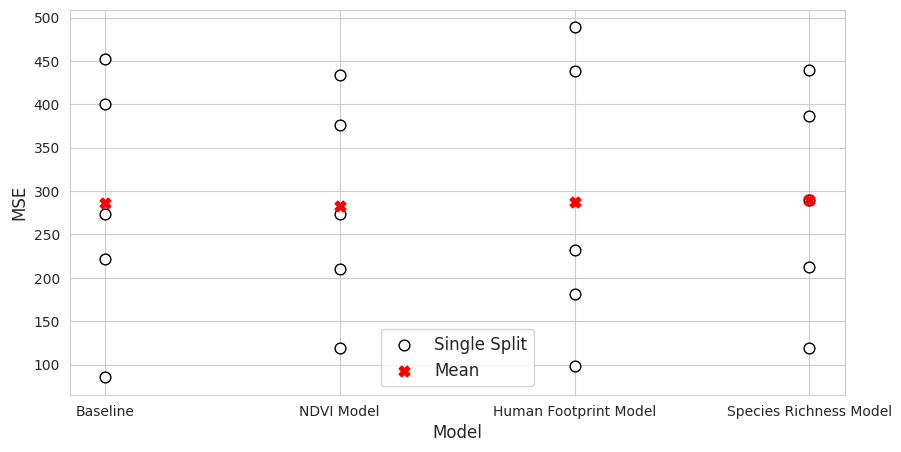

In [19]:
critter_test(axis)

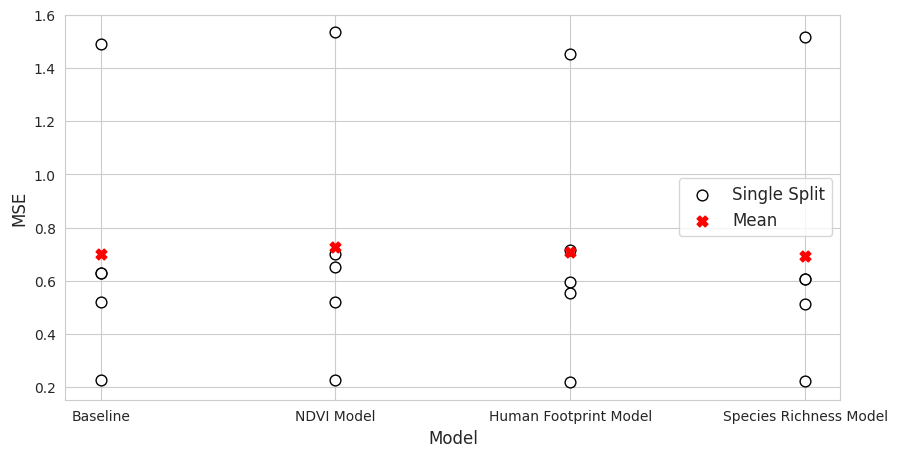

In [20]:
critter_test(loxo)

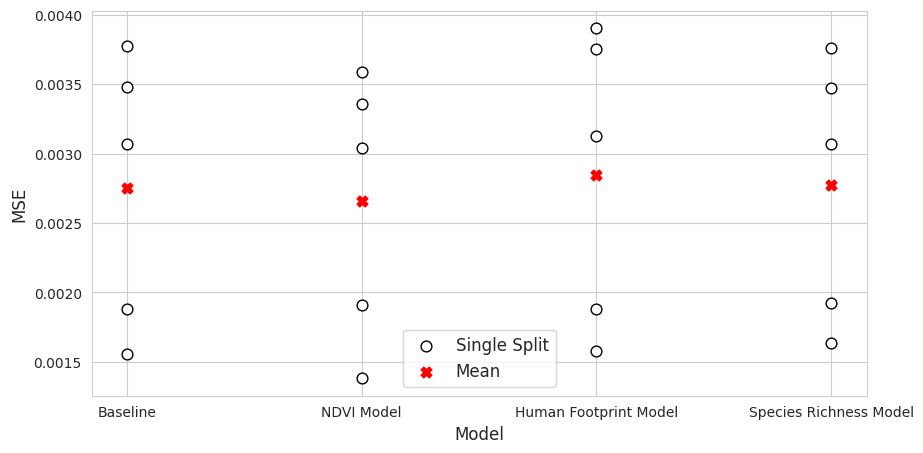

In [21]:
critter_test(pardus)

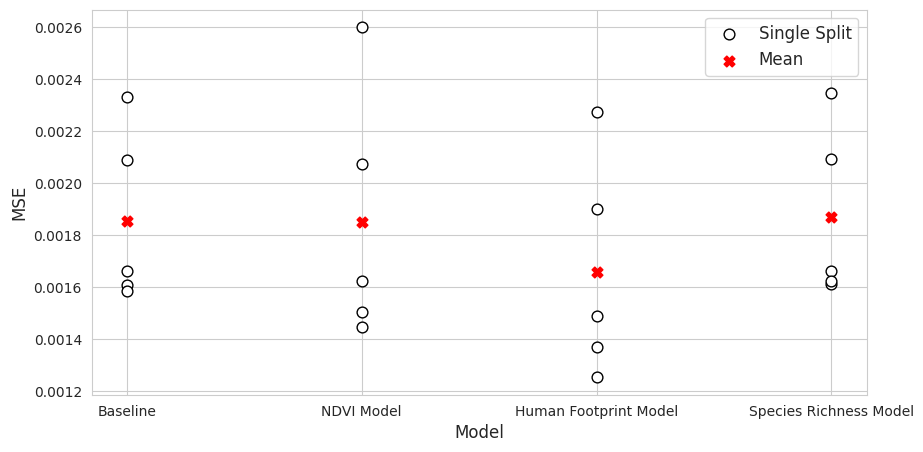

In [22]:
critter_test(tigris)

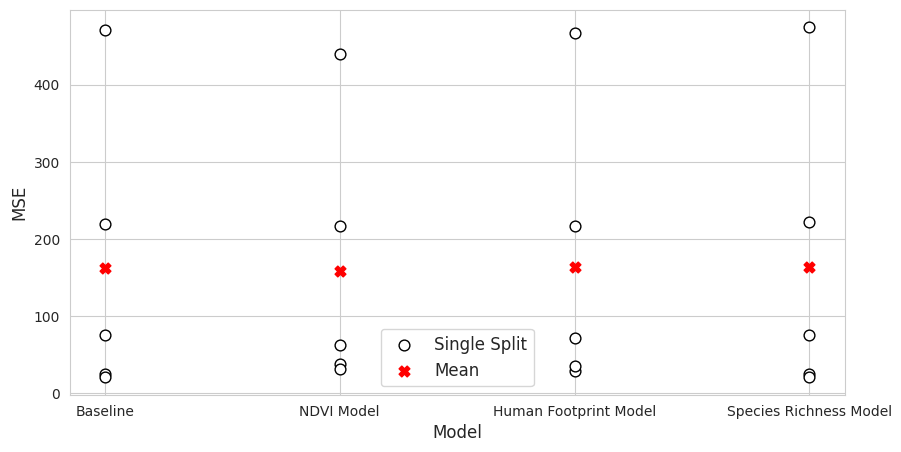

In [23]:
critter_test(sus)

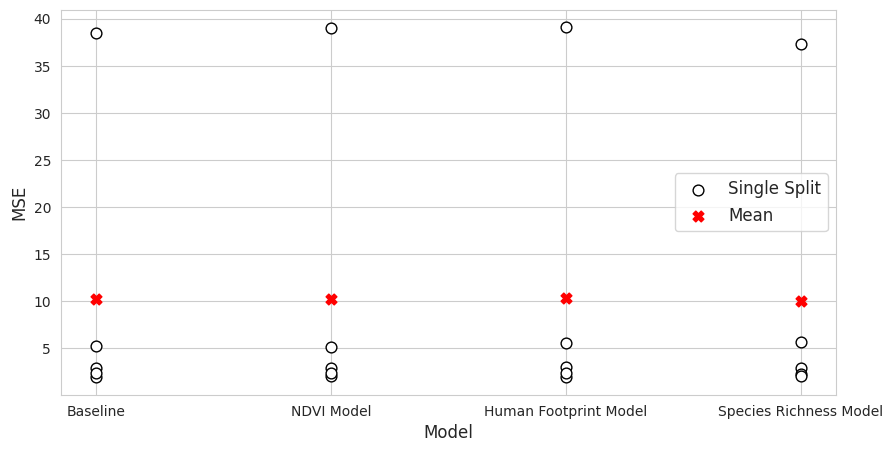

In [24]:
critter_test(syncerus)

As before, the models performed roughly the same as the baseline, though the tiger density was slightly better fit by the Human Footprint model.  We also tried some nonlinear transformations on the data to see if we could get a better fit.  We noticed that two of the entries had density values of 0.0, so we removed these to avoid running into computation errors.

In [25]:
mammals_transform = mammals_100.copy(deep=True)

In [26]:
mammals_transform['log_NDVI_1deg'] = np.log(mammals_transform['NDVI_1deg'])
mammals_transform['log_HFI_1deg'] = np.log(mammals_transform['Human Footprint_1deg'])
mammals_transform['log_SpecRich_1deg'] = np.log(mammals_transform['Species Richness_1deg'])
mammals_transform['sq_NDVI_1deg'] = mammals_transform['NDVI_1deg']**2
mammals_transform['sq_HFI_1deg'] = mammals_transform['Human Footprint_1deg']**2
mammals_transform['sq_SpecRich_1deg'] = mammals_transform['Species Richness_1deg']**2

In [27]:
i = 0
j = 0
while j < 1057:
    if mammals_transform['Density (Ind/km2)'][j] == 0:
        print(j)
        i = i+1
    j = j+1

i

398
1034


2

In [28]:
mammals_transform = mammals_transform.drop([398,1034])

In [29]:
mammals_transform['log_Density'] = np.log(mammals_transform['Density (Ind/km2)'])
mammals_transform['sq_Density'] = mammals_transform['Density (Ind/km2)']**2

Text(0, 0.5, 'MSE')

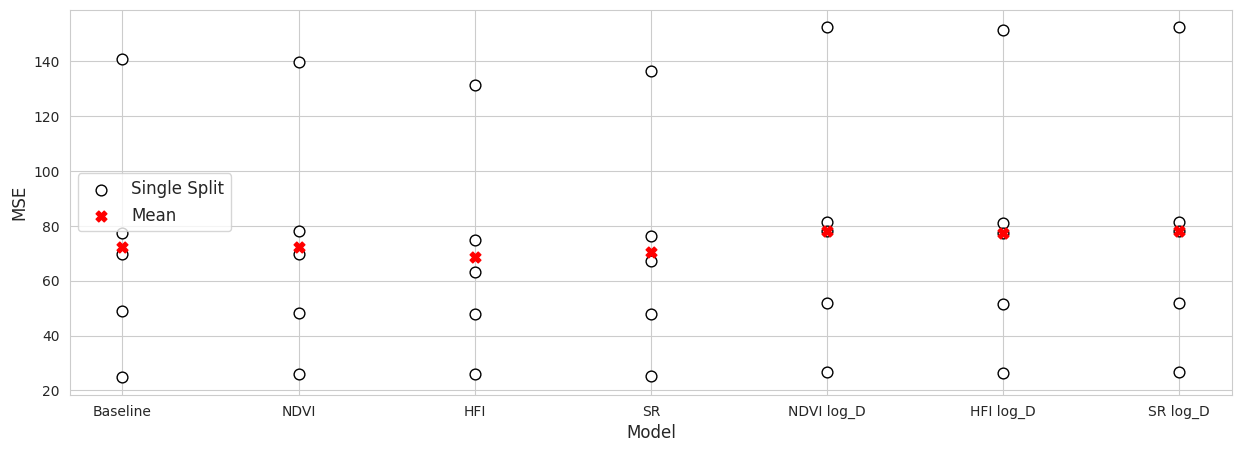

In [30]:
mammals_train, mammals_test = train_test_split(mammals_transform.copy(),
                                    random_state = 919,
                                    shuffle = True,
                                    test_size=.2)

mses = np.zeros((7, 5))
i = 0
for train_index, test_index in kfold.split(mammals_train):
    mammals_t_t = mammals_train.iloc[train_index]
    mammals_ho = mammals_train.iloc[test_index]
    
    pred0 = mammals_t_t['Density (Ind/km2)'].mean() * np.ones(len(mammals_ho))
    
    model1 = LinearRegression(copy_X=True)
    model1.fit(mammals_t_t['NDVI_1deg'].values.reshape(-1,1), mammals_t_t['Density (Ind/km2)'].values)
    pred1 = model1.predict(mammals_ho['NDVI_1deg'].values.reshape(-1,1))
    
    model2 = LinearRegression(copy_X=True)
    model2.fit(mammals_t_t['Human Footprint_1deg'].values.reshape(-1,1), mammals_t_t['Density (Ind/km2)'].values)
    pred2 = model2.predict(mammals_ho['Human Footprint_1deg'].values.reshape(-1,1))

    model3 = LinearRegression(copy_X=True)
    model3.fit(mammals_t_t['Species Richness_1deg'].values.reshape(-1,1), mammals_t_t['Density (Ind/km2)'].values)
    pred3 = model3.predict(mammals_ho['Species Richness_1deg'].values.reshape(-1,1))

    model4 = LinearRegression(copy_X=True)
    model4.fit(mammals_t_t['NDVI_1deg'].values.reshape(-1,1), mammals_t_t['log_Density'].values)
    pred4 = np.exp(model4.predict(mammals_ho['NDVI_1deg'].values.reshape(-1,1)))

    model5 = LinearRegression(copy_X=True)
    model5.fit(mammals_t_t['Human Footprint_1deg'].values.reshape(-1,1), mammals_t_t['log_Density'].values)
    pred5 = np.exp(model5.predict(mammals_ho['Human Footprint_1deg'].values.reshape(-1,1)))

    model6 = LinearRegression(copy_X=True)
    model6.fit(mammals_t_t['Species Richness_1deg'].values.reshape(-1,1), mammals_t_t['log_Density'].values)
    pred6 = np.exp(model6.predict(mammals_ho['Species Richness_1deg'].values.reshape(-1,1)))
        
    mses[0,i] = mean_squared_error(mammals_ho['Density (Ind/km2)'].values, pred0)
    mses[1,i] = mean_squared_error(mammals_ho['Density (Ind/km2)'].values, pred1)
    mses[2,i] = mean_squared_error(mammals_ho['Density (Ind/km2)'].values, pred2)
    mses[3,i] = mean_squared_error(mammals_ho['Density (Ind/km2)'].values, pred3)
    mses[4,i] = mean_squared_error(mammals_ho['Density (Ind/km2)'].values, pred4)
    mses[5,i] = mean_squared_error(mammals_ho['Density (Ind/km2)'].values, pred5)
    mses[6,i] = mean_squared_error(mammals_ho['Density (Ind/km2)'].values, pred6)
   
    i = i + 1
    
plt.figure(figsize=(15,5))

plt.scatter(np.zeros(5), 
            mses[0,:], 
            s=60, 
            c='white',
            edgecolor='black',
            label="Single Split")
plt.scatter(np.ones(5), 
            mses[1,:], 
            s=60, 
            c='white',
            edgecolor='black')
plt.scatter(2*np.ones(5), 
            mses[2,:], 
            s=60, 
            c='white',
            edgecolor='black')
plt.scatter(3*np.ones(5), 
            mses[3,:], 
            s=60, 
            c='white',
            edgecolor='black')
plt.scatter(4*np.ones(5), 
            mses[4,:], 
            s=60, 
            c='white',
            edgecolor='black')
plt.scatter(5*np.ones(5), 
            mses[5,:], 
            s=60, 
            c='white',
            edgecolor='black')
plt.scatter(6*np.ones(5), 
            mses[6,:], 
            s=60, 
            c='white',
            edgecolor='black')

plt.scatter([0,1,2,3,4,5,6], 
            np.mean(mses, axis=1), 
            s=60, 
            c='r',
            marker='X',
            label="Mean")

plt.legend(fontsize=12)

plt.xticks([0,1,2,3,4,5,6],["Baseline", "NDVI", "HFI", "SR",'NDVI log_D','HFI log_D','SR log_D'], fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Model", fontsize=12)
plt.ylabel("MSE", fontsize=12)


In general, the models based on log- or quadratic- transformed data performed worse than the original ones.

In [35]:
mammals_model = LinearRegression(copy_X=True)

In [36]:
mammals_train, mammals_test = train_test_split(mammals_100.copy(),
                                        random_state = 919,
                                        shuffle = True,
                                        test_size=.2)

In [37]:
mammals_model.fit(mammals_train['Human Footprint_1deg'].values.reshape(-1,1), mammals_train['Density (Ind/km2)'].values)

LinearRegression()

In [38]:
train_MSE = np.round(mean_squared_error(mammals_train['Density (Ind/km2)'].values, mammals_model.predict(mammals_train['Human Footprint_1deg'].values.reshape(-1,1))),2)
test_MSE = np.round(mean_squared_error(mammals_test['Density (Ind/km2)'].values, mammals_model.predict(mammals_test['Human Footprint_1deg'].values.reshape(-1,1))),2)

print("Training set RMSE:", 
      np.sqrt(train_MSE))

print("Test set RMSE:", 
      np.sqrt(test_MSE))

Training set RMSE: 7.9536155300592695
Test set RMSE: 6.1773780845922


In [41]:
np.sqrt(np.mean(mses[0,:])) #baseline rmse 

8.497342725573908